In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


In [3]:
data = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')
data.describe()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Reads the data into dataframe and generates descriptive statistics, including count, mean, standard deviation, minimum, maximum, and quartile values, for each numerical column in the dataset.

In [4]:
data.shape

(10000, 12)

Provides the total number of rows and columns present in the dataframe.

In [5]:
numerical_columns = data.select_dtypes(include='number').columns.tolist()
categorical_columns = data.select_dtypes(exclude='number').columns.tolist()
numerical_columns.remove('churn')
print("Numerical Features:", numerical_columns , "\n")
print("Categorical Features", categorical_columns)

Numerical Features: ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary'] 

Categorical Features ['country', 'gender']


Provides the list of columns that contains numerical and categorial features.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
numerical_features = [ 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

statistics = data[numerical_features].describe()

# Computing mode separately for categorical-like numerical features
mode_values = data[numerical_features].mode().iloc[0]

# Variance and standard deviation
variance_values = data[numerical_features].var()
std_dev_values = data[numerical_features].std()

# Median calculation (as describe() doesn't provide it)
median_values = data[numerical_features].median()

# Displaying the results
print("Descriptive statistics:")
print(statistics)

print("\nMode values:")
print(mode_values)

print("\nVariance:")
print(variance_values)

Descriptive statistics:
       credit_score           age        tenure        balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  
count     10000.000000  10000.00000   10000.000000      10000.000000  
mean          1.530200      0.70550       0.515100     100090.239881  
std           0.581654      0.45584       0.499797      57510.492818  
min           1.000000      0.00000       0.000000         11.580000  
25%           1.000000    

Generates the mean,standard deviation,mode and median values for each and every numerical feature that is present in the dataframe.

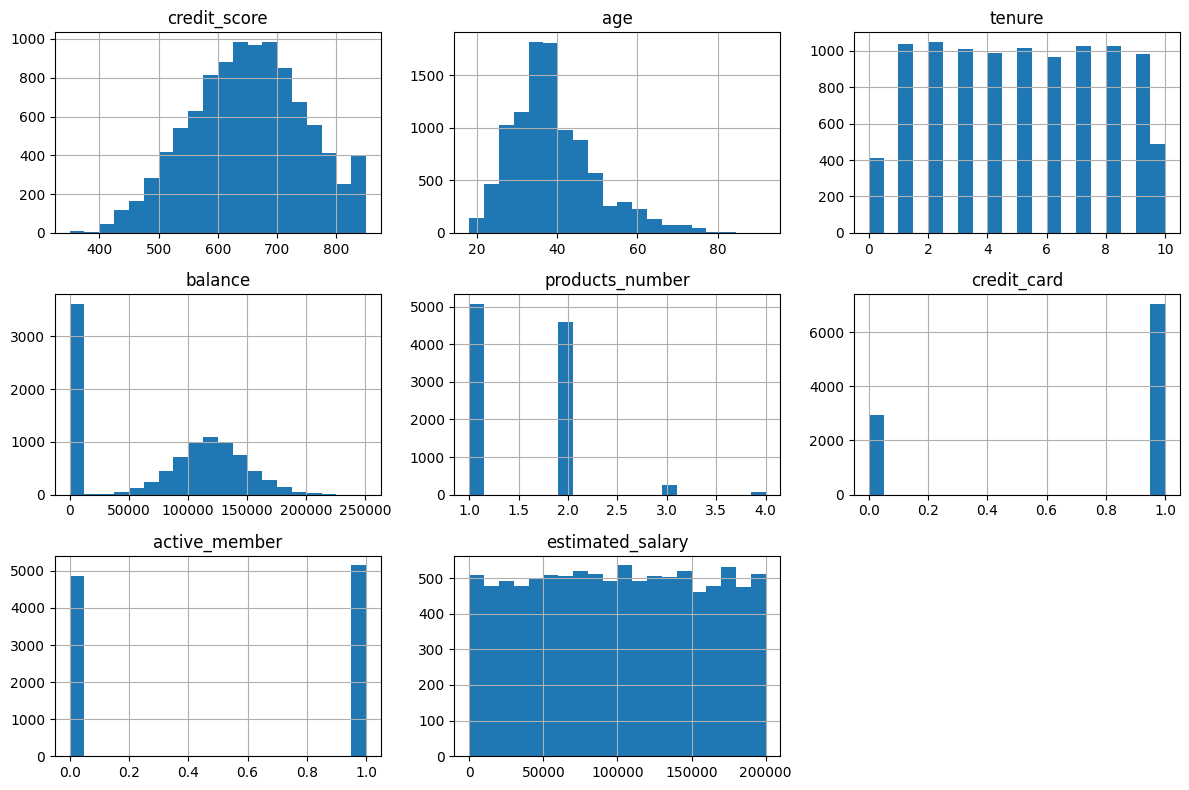

In [8]:

# Creating subplots for histograms of each numerical feature
data[numerical_features].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


Creates individual histograms for each numerical feature present in a dataframe.It helps in visualizing the distribution of numerical data across different columns within a dataframe.

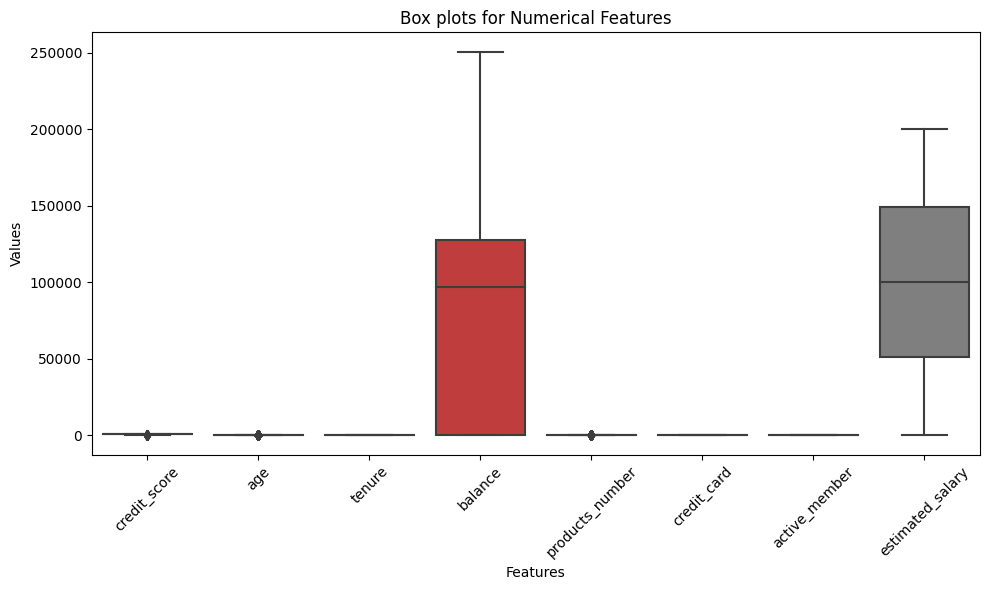

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_features])

plt.title('Box plots for Numerical Features')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.xlabel('Features')

plt.tight_layout()
plt.show()


Create box plots for multiple numerical features present in a dataframe.It helps for visually examining the distribution and variability of numerical data across multiple features simultaneously, 

/tmp/ipykernel_42/809456087.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)
/tmp/ipykernel_42/809456087.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)
/tmp/ipykernel_42/809456087.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)
/tmp/ipykernel_42/809456087.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)
/tmp/ipykernel_42/809456087.py:5: FutureWarning: 

`shade` is now deprecated

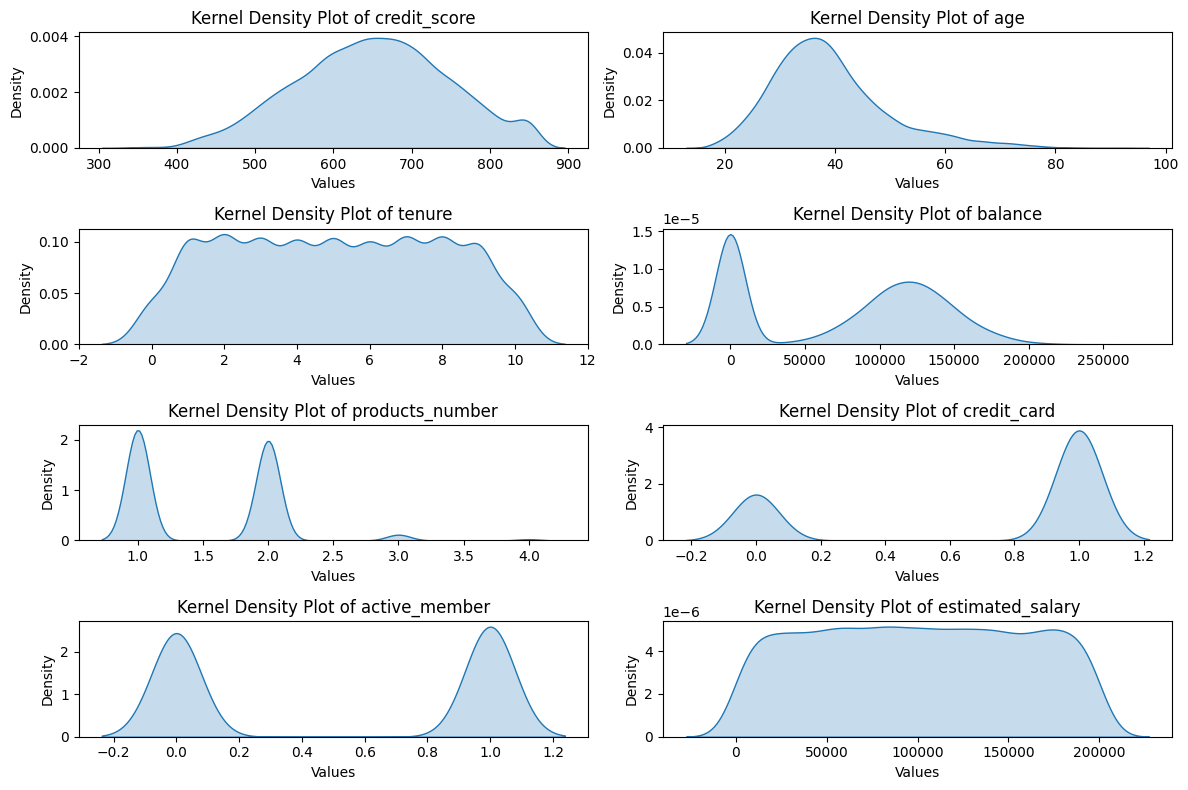

In [23]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//2, 2, i+1)  # Creating subplots
    sns.kdeplot(data[feature], shade=True)
    plt.title(f'Kernel Density Plot of {feature}')
    plt.xlabel('Values')

plt.tight_layout()
plt.show()

Provides a set of Kernel Density Plots (KDE plots) for multiple numerical features present in a dataframe.It allows for a comparative analysis of the data distribution across various numerical features.

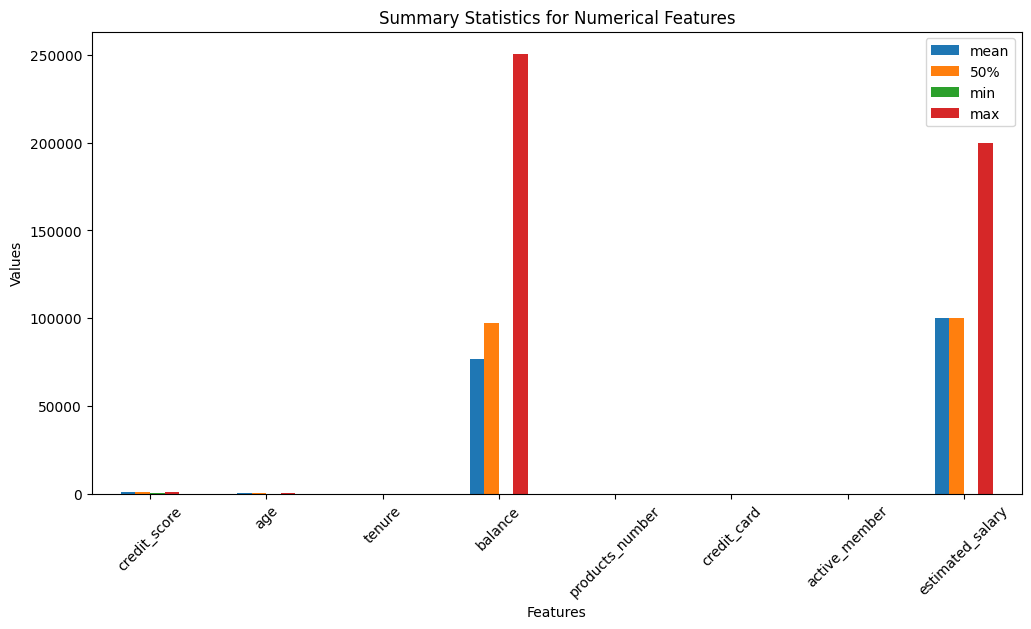

In [11]:
summary_stats = data[numerical_features].describe().transpose()

# Plotting summary statistics (mean, median, min, max) for each numerical feature
summary_stats[['mean', '50%', 'min', 'max']].plot(kind='bar', figsize=(12, 6))
plt.title('Summary Statistics for Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

Provides the summary of statistics such as mean, median, minimum, and maximum for each numerical feature present in a dataframe.

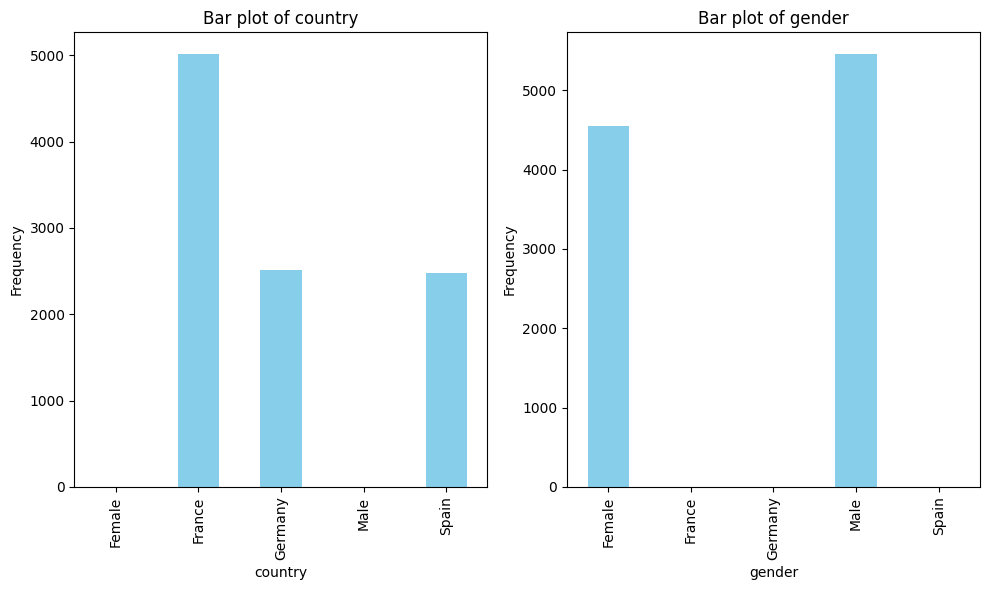

In [12]:
categorical_features = ['country', 'gender']
category_counts = data[categorical_features].apply(pd.Series.value_counts)

# Transposing the dataframe for better visualization
category_counts = category_counts.T

# Plotting bar plots for each categorical feature
plt.figure(figsize=(10, 6))

for i, feature in enumerate(category_counts.index):
    plt.subplot(1, len(categorical_features), i+1)
    category_counts.loc[feature].plot(kind='bar', color='skyblue')
    plt.title(f'Bar plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

It helps in identifying the frequency distribution of categorical variables 'country' and 'gender' present in a dataframe. 

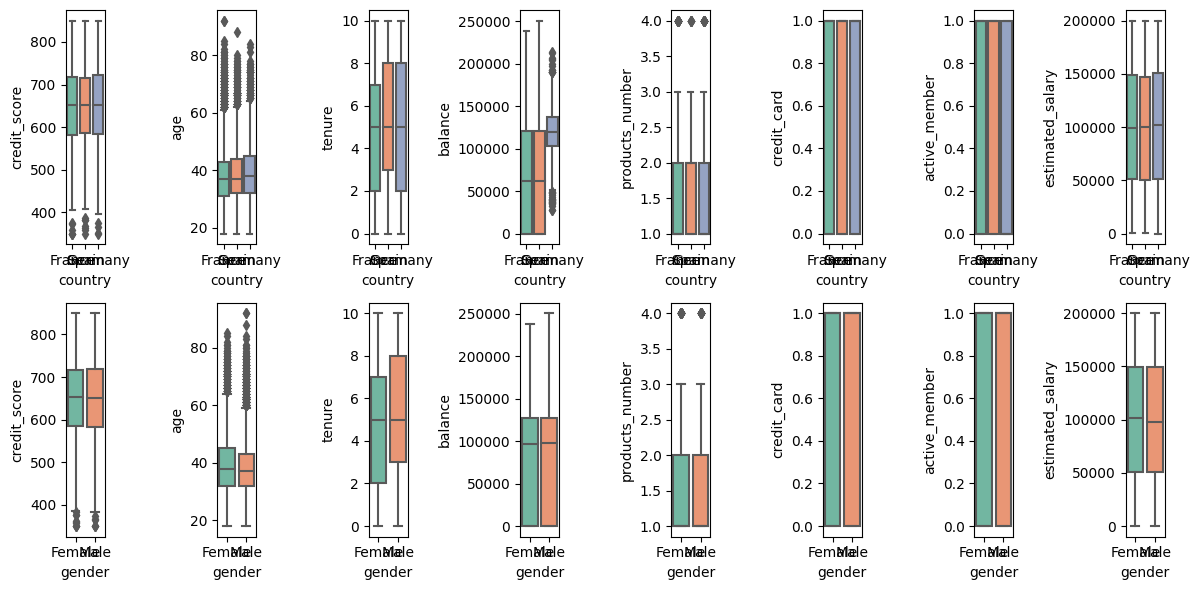

In [13]:
plt.figure(figsize=(12, 6))

for i, cat_feature in enumerate(categorical_features):
    for j, num_feature in enumerate(numerical_features):
        plt.subplot(len(categorical_features), len(numerical_features), i * len(numerical_features) + j + 1)
        sns.boxplot(x=cat_feature, y=num_feature, data=data, palette='Set2')
        
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)

plt.tight_layout()
plt.show()


Creates a grid of box plots to visualize the relationship between categorical variables and numerical variables in a dataset.It helps in understanding the exploration of the distribution of numerical data across categories within different categorical features.

In [14]:
for feature in categorical_features:
    frequency_table = data[feature].value_counts().reset_index()
    frequency_table.columns = [feature, 'Frequency']
    
    print(f"Frequency table for '{feature}':")
    print(frequency_table)
    print("\n")

Frequency table for 'country':
   country  Frequency
0   France       5014
1  Germany       2509
2    Spain       2477


Frequency table for 'gender':
   gender  Frequency
0    Male       5457
1  Female       4543




Generates and displays frequency tables that show the count of occurrences for each unique category within each categorical feature in the dataframe.

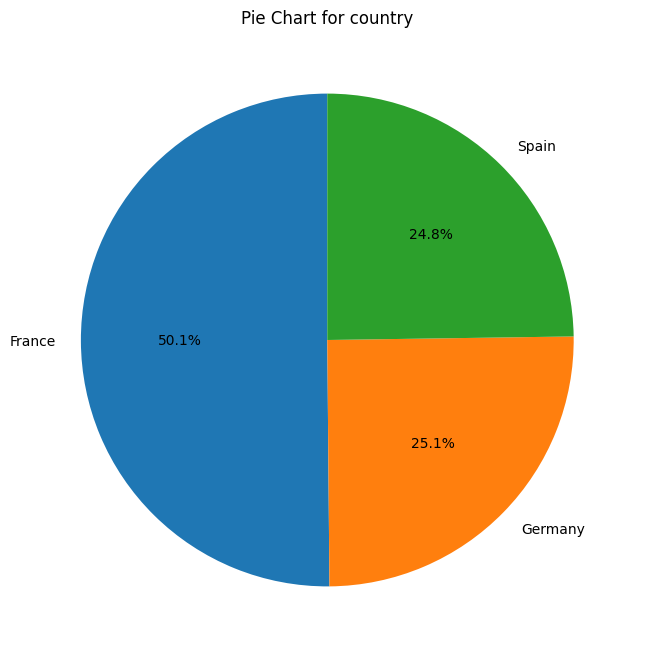

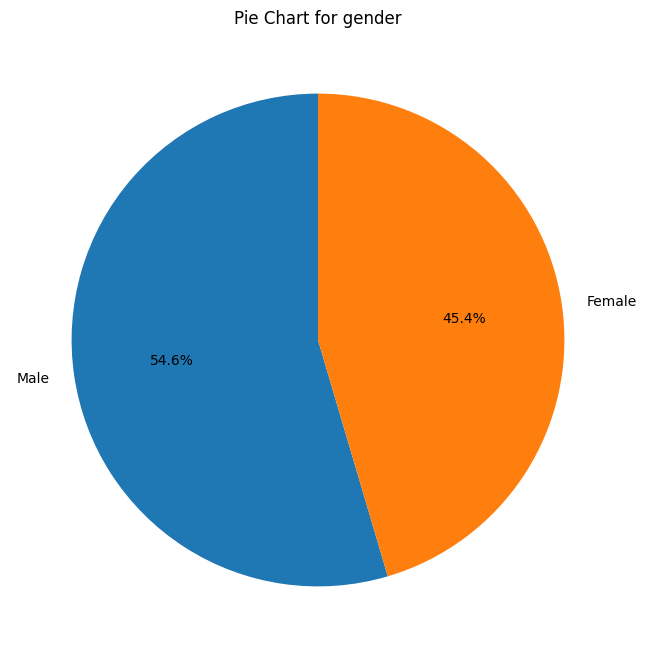

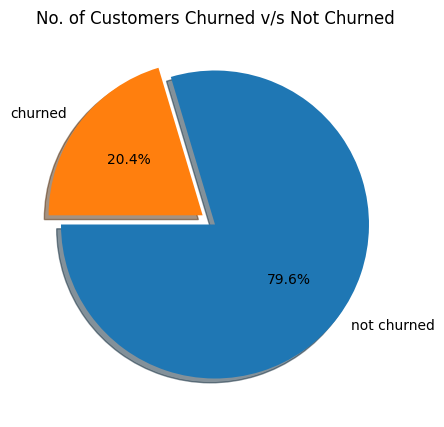

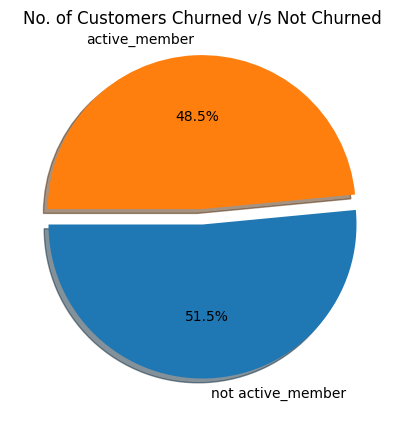

In [15]:
for column in categorical_features:
    plt.figure(figsize=(8, 8))
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart for {column}')
    plt.ylabel('')
    plt.show()
class_counts = data['churn'].value_counts()
fig = plt.figure(figsize=(5,5)) 
plt.pie(class_counts, labels=['not churned','churned'],explode=(0,0.1),shadow=True, autopct="%1.1f%%", startangle=180)
plt.title('No. of Customers Churned v/s Not Churned')
plt.show()

class_counts = data['active_member'].value_counts()
fig = plt.figure(figsize=(5,5)) 
plt.pie(class_counts, labels=['not active_member','active_member'],explode=(0,0.1),shadow=True, autopct="%1.1f%%", startangle=180)
plt.title('No. of Customers Churned v/s Not Churned')
plt.show()

Demonstrates the use of pie charts to visualize the distribution of categorical data, including specific visualizations for the 'churn' and 'active_member' columns.

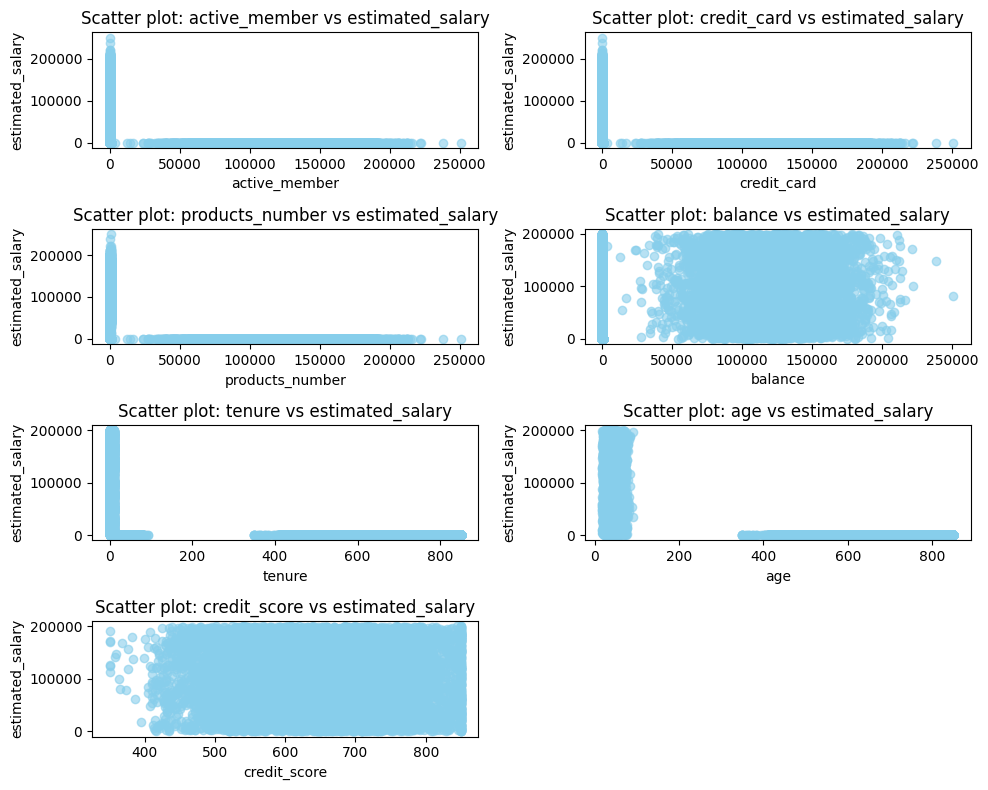

In [16]:
plt.figure(figsize=(10, 8))

for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        plt.subplot(len(numerical_features)//2, 2, j-i)
        plt.scatter(data[numerical_features[i]], data[numerical_features[j]], color='skyblue', alpha=0.6)
        plt.xlabel(numerical_features[i])
        plt.ylabel(numerical_features[j])
        plt.title(f'Scatter plot: {numerical_features[i]} vs {numerical_features[j]}')

plt.tight_layout()
plt.show()

Generates scatter plots to visualize the relationships between pairs of numerical features in a dataframe also visualizes the relationships, correlations, or patterns between different numerical columns.

In [17]:
correlation_matrix = data[numerical_features].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  credit_score       age    tenure   balance  products_number  \
credit_score          1.000000 -0.003965  0.000842  0.006268         0.012238   
age                  -0.003965  1.000000 -0.009997  0.028308        -0.030680   
tenure                0.000842 -0.009997  1.000000 -0.012254         0.013444   
balance               0.006268  0.028308 -0.012254  1.000000        -0.304180   
products_number       0.012238 -0.030680  0.013444 -0.304180         1.000000   
credit_card          -0.005458 -0.011721  0.022583 -0.014858         0.003183   
active_member         0.025651  0.085472 -0.028362 -0.010084         0.009612   
estimated_salary     -0.001384 -0.007201  0.007784  0.012797         0.014204   

                  credit_card  active_member  estimated_salary  
credit_score        -0.005458       0.025651         -0.001384  
age                 -0.011721       0.085472         -0.007201  
tenure               0.022583      -0.028362          0

Generates the correlation matrix for the specified numerical columns in the dataframe.

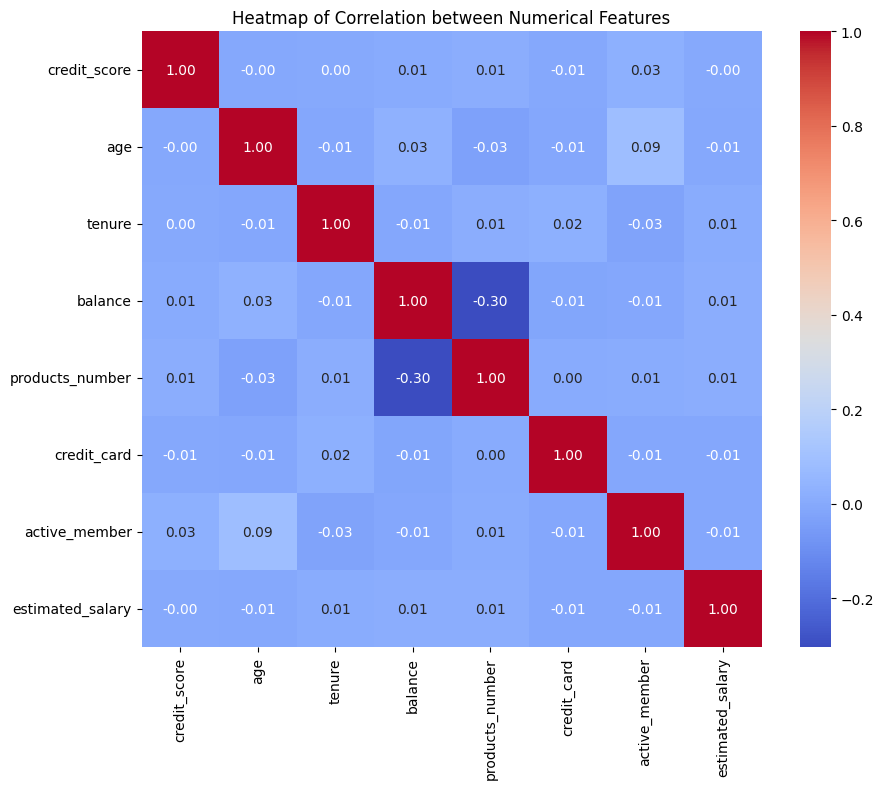

In [18]:
correlation_matrix = data[numerical_features].corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation between Numerical Features')
plt.show()

Plots the correlation matrix for the specified numerical columns in the dataframe.

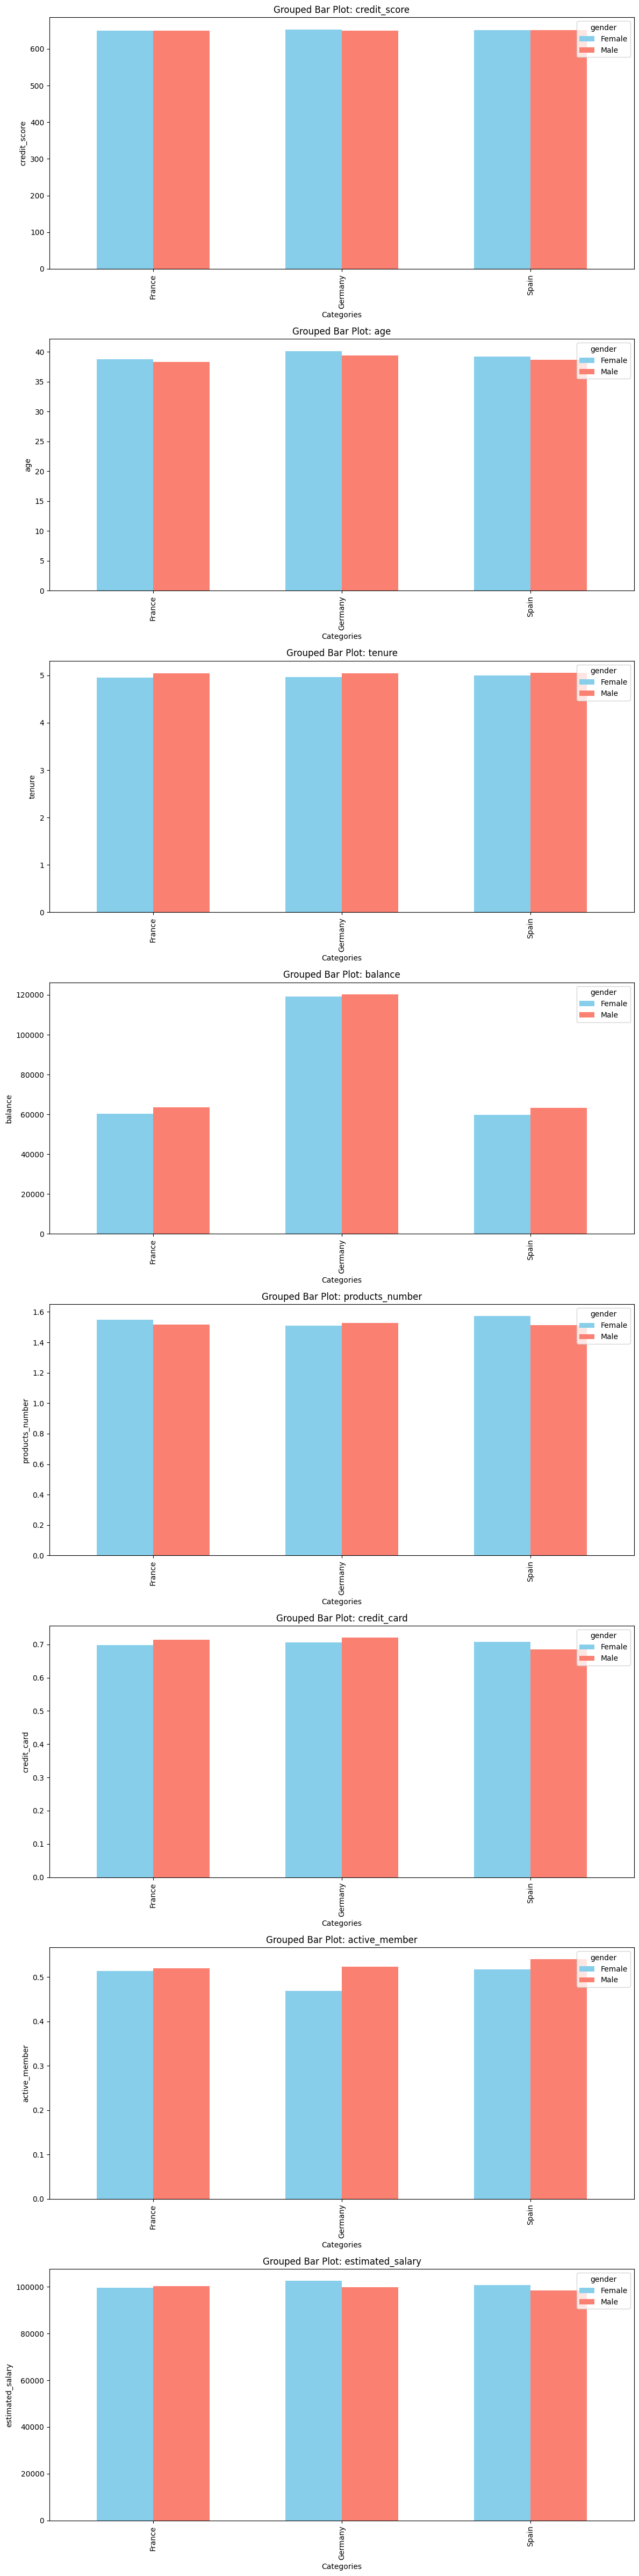

In [19]:
plt.figure(figsize=(12, 6 * len(numerical_features)))

for i, num_feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i + 1)
    grouped_data = data.groupby(categorical_features)[num_feature].mean().unstack()
    grouped_data.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'salmon', 'lightgreen', 'orange'], width=0.6)
    plt.title(f'Grouped Bar Plot: {num_feature}')
    plt.xlabel('Categories')
    plt.ylabel(num_feature)
    plt.legend(title=categorical_features[1], loc='upper right')

plt.tight_layout()
plt.show()

Generates grouped bar plots to visualize the mean values of numerical features across different categories defined by categorical features. 

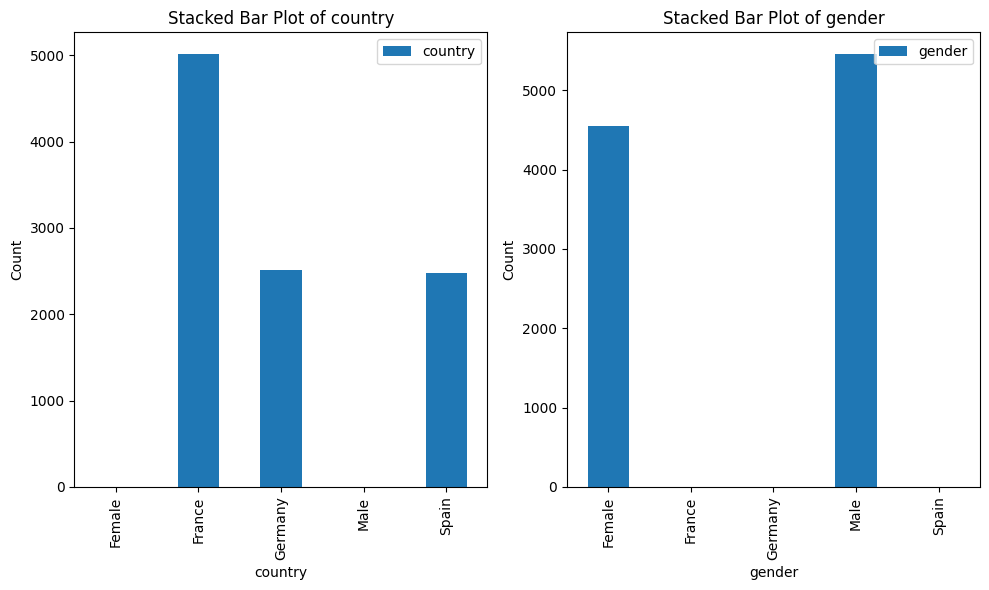

In [20]:
category_counts = data[categorical_features].apply(pd.Series.value_counts)

# Transposing the dataframe for better visualization
category_counts = category_counts.T

# Plotting stacked bar plots for each categorical feature
plt.figure(figsize=(10, 6))

for i, feature in enumerate(category_counts.index):
    plt.subplot(1, len(category_counts), i + 1)
    category_counts.loc[feature].plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Creates stacked bar plots for each categorical feature, showcasing the count of categories within each feature to visualize the counts of each category within categorical features present in a dataframe.

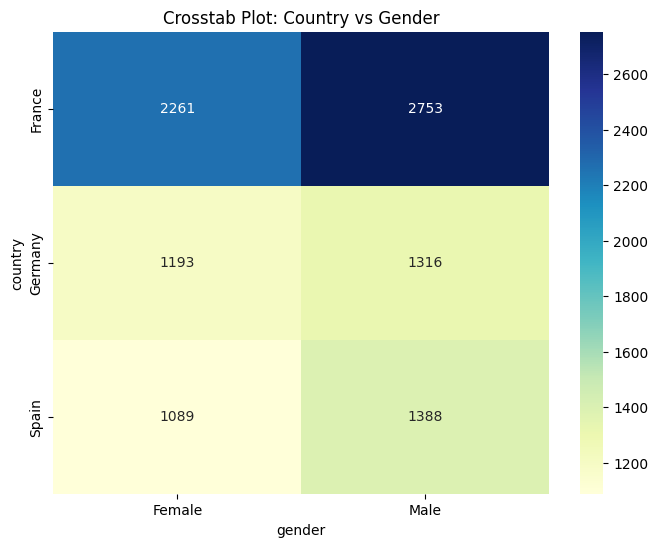

In [21]:
crosstab_data = pd.crosstab(data[categorical_features[0]], data[categorical_features[1]])

# Plotting the crosstab as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Crosstab Plot: Country vs Gender')
plt.xlabel(categorical_features[1])
plt.ylabel(categorical_features[0])
plt.show()

Provides a cross-tabulation between two categorical features and visualizes it as a heatmap.It also provides a clear overview of the frequency distribution and relationships between the categories of those features. 

Relative frequencies for 'country':
country
France     50.14
Germany    25.09
Spain      24.77
Name: count, dtype: float64




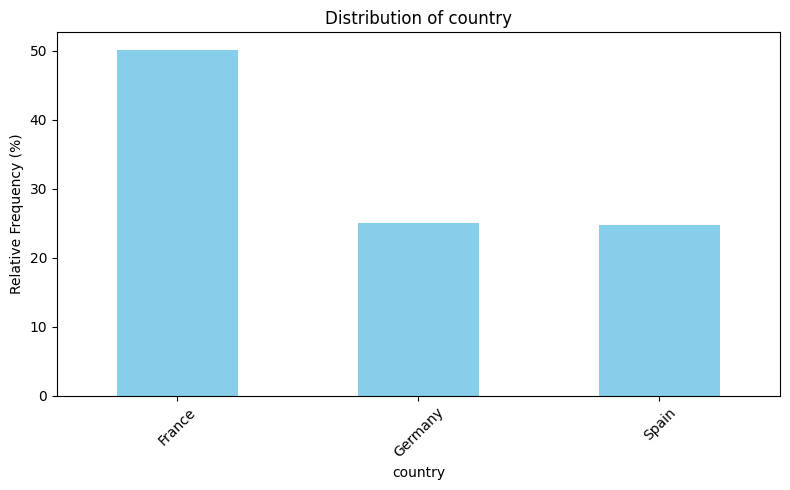

Relative frequencies for 'gender':
gender
Male      54.57
Female    45.43
Name: count, dtype: float64




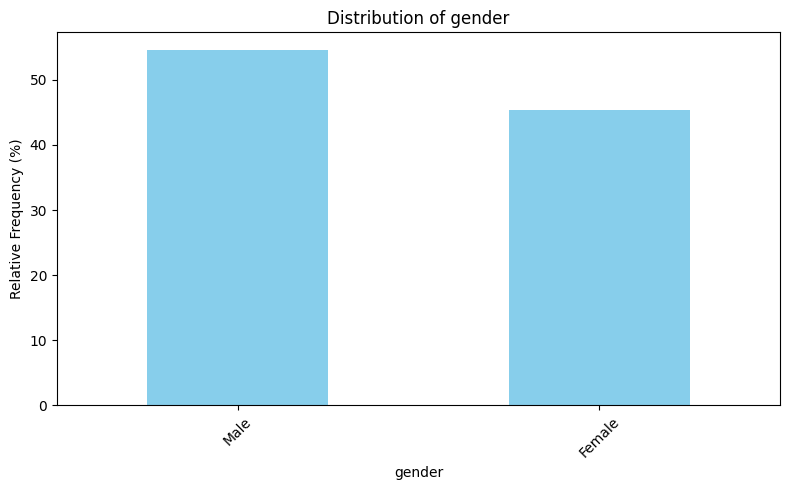

In [22]:
for feature in categorical_features:
    # Count the occurrences of each category
    category_counts = data[feature].value_counts()
    
    # Calculate relative frequencies (percentages)
    relative_frequencies = category_counts / category_counts.sum() * 100
    
    print(f"Relative frequencies for '{feature}':")
    print(relative_frequencies)
    print("\n")
    
    plt.figure(figsize=(8, 5))
    relative_frequencies.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

It visualizes the distribution of categories within categorical features, displaying their relative frequencies as percentages in bar plot form. 